In [3]:
from google.colab import files
uploaded = files.upload()

Saving agricultural_yield.csv to agricultural_yield.csv


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [5]:
df = pd.read_csv('agricultural_yield.csv')
df.head()

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,93.304721,0,132.522218,96.670922,602.386237,3,278.986563
1,83.674653,1,57.283997,99.007556,466.518251,8,836.434840
2,65.963033,1,227.895479,104.844272,510.320495,4,785.881787
3,78.692834,1,176.314126,90.136191,354.350914,5,807.884526
4,72.415684,1,160.070418,101.221668,443.993788,10,1064.542374


In [6]:
X= df[['Soil_Quality', 'Seed_Variety', 'Fertilizer_Amount_kg_per_hectare','Sunny_Days','Rainfall_mm', 'Irrigation_Schedule',]]
Y= df['Yield_kg_per_hectare'].values

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
model = Sequential ([
    Dense(64, activation='relu', input_shape=(6,)),
    Dense(32, activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [15]:
history=model.fit(x_train,y_train,epochs=50,batch_size=32,validation_split=0.2,verbose=1)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 536817.3750 - mae: 705.3998 - val_loss: 558461.3750 - val_mae: 720.7744
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 524327.1875 - mae: 697.3718 - val_loss: 511181.8438 - val_mae: 688.6844
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 454185.5625 - mae: 646.4751 - val_loss: 388877.2188 - val_mae: 599.3089
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 332053.6875 - mae: 550.1448 - val_loss: 207970.7188 - val_mae: 435.6859
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 156033.2812 - mae: 372.0781 - val_loss: 64723.1641 - val_mae: 234.0286
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 44954.1758 - mae: 188.0361 - val_loss: 17047.4023 - val_mae: 106.9313
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 15266.7490 - mae: 99.8902 - val_loss: 10583.2168 - val_mae: 82.4843
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 10734.9326 - mae: 82.5577 - val_loss: 9

In [19]:
test_loss, test_mae = model.evaluate(x_test,y_test, verbose=1)
print(f"Test Mean Absolute Error: {test_mae:.2f}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2993.1667 - mae: 44.4898
Test Mean Absolute Error: 42.22


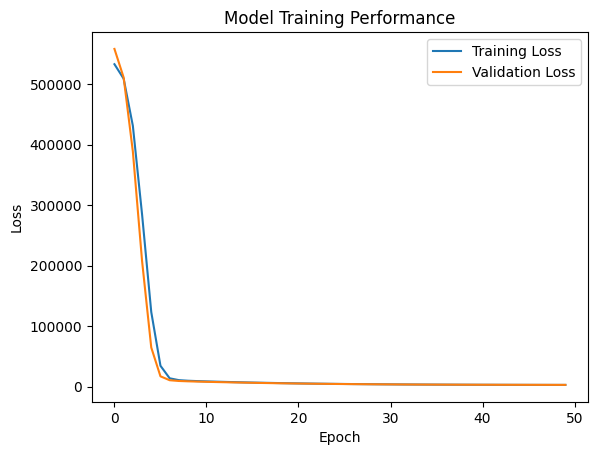

In [20]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Training Performance')
plt.show()

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


<ipython-input-27-81a8e7fd6f94>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label='Actual Yield')
<ipython-input-27-81a8e7fd6f94>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y__pred, label='Predicted Yield')


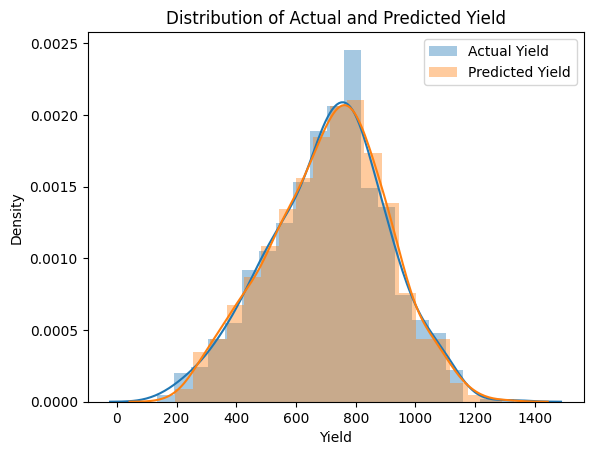

In [27]:
# Distribution plots
import seaborn as sns
y_pred = model.predict(x_test)
y__pred = y_pred.flatten()
sns.distplot(y_test, label='Actual Yield')
sns.distplot(y__pred, label='Predicted Yield')
plt.xlabel("Yield")
plt.ylabel("Density")
plt.title("Distribution of Actual and Predicted Yield")
plt.legend()
plt.show()